In [71]:
import pandas as pd
pd.options.display.max_columns = 100

In [72]:
muts_df = pd.read_pickle("./data/4_df.pkl")
display(muts_df.shape, muts_df.head())

(2537, 43)

,index,Details,mutation target annotation,Mut ID,Mutation Type,Position,Reference Seq,Sequence Change,ale,exp,flask,isolate,presence,tech_rep,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,TSS,RBS,cis-regulatory RNA,attenuator terminator,terminator,genetic,genomic features,RegulonDB Gene,mutation size,gene count,disrupt,repaired,taxonomy-id,strain-description,base-media,temperature,carbon-source,nitrogen-source,phosphorous-source,sulfur-source,supplement
0,2,R110G (CGT→GGT),clsA,NaN,SNP,1308318,NaN,G→C,1,42C,124,1,1.0,1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",clsA,1,1,False,False,511145,BOP27,M9,42 celsius,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements
1,6,None,rph,NaN,DEL,3815859,NaN,Δ82 bp,1,42C,124,1,1.0,1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...",rph,82,1,True,False,511145,BOP27,M9,42 celsius,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements
2,7,A734V (GCG→GTG),rpoC,NaN,SNP,4187550,NaN,C→T,1,42C,124,1,1.0,1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{ECK125239996},{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",rpoC,1,1,False,False,511145,BOP27,M9,42 celsius,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements
3,8,D9A (GAT→GCT),hfq,NaN,SNP,4400313,NaN,A→C,1,42C,124,1,1.0,1,True,"(4400313, 4400313)",{ECK120000431},"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",False,False,{},{},{},{},{},{},{},True,"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",hfq,1,1,False,False,511145,BOP27,M9,42 celsius,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements
4,0,coding (380‑400/1149 nt),nagA,NaN,DEL,702352,NaN,Δ21 bp,1,42C,124,1,1.0,1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",nagA,21,1,False,False,511145,BOP27,M9,42 celsius,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements


In [73]:
muts_df.exp.unique()

array(['42C', 'C13', 'Central_carbon_knockout_PTS',
       'Central_carbon_knockout_glucose_evolution',
       'Central_carbon_knockout_gnd', 'Central_carbon_knockout_pgi',
       'Central_carbon_knockout_sdh', 'Central_carbon_knockout_tpiA',
       'GLU', 'GYD', 'LTEE', 'LTEE_Ara', 'PGI', 'SER', 'SSW_AC',
       'SSW_GLU_AC', 'SSW_GLU_GLY', 'SSW_GLU_XYL', 'SSW_GLY', 'SSW_XYL'],
      dtype=object)

Didn't have to split things up first; could have simply added the "non-KO ALE" and "KO ALE" labels after calculating the proportions for ALEs.

In [74]:
# removing external ALE experiment since hadn't used an ALE machine and therefore has complicating stationary phase mutations
muts_df = muts_df[~muts_df.exp.str.contains("LTEE")]
len(muts_df)

1732

In [75]:
KO_exp_l = ["PGI",
            'Central_carbon_knockout_PTS',
            'Central_carbon_knockout_gnd',
            'Central_carbon_knockout_pgi',
            'Central_carbon_knockout_sdh',
            'Central_carbon_knockout_tpiA', ]
KO_muts_df = muts_df[muts_df.exp.isin(KO_exp_l)].copy()
KO_muts_df.exp.unique()

array(['Central_carbon_knockout_PTS', 'Central_carbon_knockout_gnd',
       'Central_carbon_knockout_pgi', 'Central_carbon_knockout_sdh',
       'Central_carbon_knockout_tpiA', 'PGI'], dtype=object)

In [76]:
non_KO_muts_df = muts_df[~muts_df.exp.isin(KO_exp_l)].copy()
non_KO_muts_df.exp.unique()

array(['42C', 'C13', 'Central_carbon_knockout_glucose_evolution', 'GLU',
       'GYD', 'SER', 'SSW_AC', 'SSW_GLU_AC', 'SSW_GLU_GLY', 'SSW_GLU_XYL',
       'SSW_GLY', 'SSW_XYL'], dtype=object)

In [77]:
KO_ALE_coding_prop_df = pd.DataFrame()
for exp_ale_name_tuple, ale_mut_df in KO_muts_df.groupby(["exp", "ale"]):
    if ale_mut_df.ale.iloc[0] != 0:  # Ignoring starting strain mutations
        total_single_target_mut_count = 0
        coding_mut_count = 0
        for _,m in ale_mut_df.iterrows():
            if len(m["genetic features"]) == 1:  # Ignoring mutations that include more than one genetic target
                for genetic_f in m["genetic features"]:
                    total_single_target_mut_count += 1
                    if '/' not in genetic_f["name"]: coding_mut_count += 1
        KO_ALE_coding_prop_df = KO_ALE_coding_prop_df.append({
            "exp":ale_mut_df.exp.iloc[0],
            "ale":ale_mut_df.ale.iloc[0],
            "coding mutation proportion":coding_mut_count/total_single_target_mut_count},
            ignore_index=True)
KO_ALE_coding_prop_df["exp type"] = "KO ALE"
KO_ALE_coding_prop_df.head()

,ale,coding mutation proportion,exp,exp type
0,9.0,1.000000,Central_carbon_knockout_PTS,KO ALE
1,10.0,0.333333,Central_carbon_knockout_PTS,KO ALE
2,11.0,0.875000,Central_carbon_knockout_PTS,KO ALE
3,12.0,0.833333,Central_carbon_knockout_PTS,KO ALE
4,17.0,0.666667,Central_carbon_knockout_gnd,KO ALE


In [78]:
non_KO_ALE_coding_prop_df = pd.DataFrame()
for exp_ale_name_tuple, ale_mut_df in non_KO_muts_df.groupby(["exp", "ale"]):
    if ale_mut_df.ale.iloc[0] != 0:  # Ignoring starting strain mutations
        total_single_target_mut_count = 0
        coding_mut_count = 0
        for _,m in ale_mut_df.iterrows():
            if len(m["genetic features"]) == 1:  # Ignoring mutations that include more than one genetic target
                for genetic_f in m["genetic features"]:
                    total_single_target_mut_count += 1
                    if '/' not in genetic_f["RegulonDB ID"]: # Not using "name" field due to phantom genes without names
                        coding_mut_count += 1
        non_KO_ALE_coding_prop_df = non_KO_ALE_coding_prop_df.append({
            "exp":ale_mut_df.exp.iloc[0],
            "ale":ale_mut_df.ale.iloc[0],
            "coding mutation proportion":coding_mut_count/total_single_target_mut_count},
            ignore_index=True)
non_KO_ALE_coding_prop_df["exp type"] = "non-KO ALE"
non_KO_ALE_coding_prop_df.head()

,ale,coding mutation proportion,exp,exp type
0,1.0,1.000000,42C,non-KO ALE
1,2.0,0.818182,42C,non-KO ALE
2,3.0,0.814815,42C,non-KO ALE
3,4.0,0.714286,42C,non-KO ALE
4,5.0,0.714286,42C,non-KO ALE


In [84]:
import seaborn as sns
import matplotlib as plt
plt.rcParams["figure.dpi"] = 200
sns.set_context("notebook")
sns.set_style("whitegrid")

In [88]:
combo_ALE_coding_prop_df = pd.concat([non_KO_ALE_coding_prop_df, KO_ALE_coding_prop_df])
combo_ALE_coding_prop_df.exp.unique()

array(['42C', 'C13', 'Central_carbon_knockout_glucose_evolution', 'GLU',
       'GYD', 'SER', 'SSW_AC', 'SSW_GLU_AC', 'SSW_GLU_GLY', 'SSW_GLU_XYL',
       'SSW_GLY', 'SSW_XYL', 'Central_carbon_knockout_PTS',
       'Central_carbon_knockout_gnd', 'Central_carbon_knockout_pgi',
       'Central_carbon_knockout_sdh', 'Central_carbon_knockout_tpiA',
       'PGI'], dtype=object)

Text(0, 0.5, '')

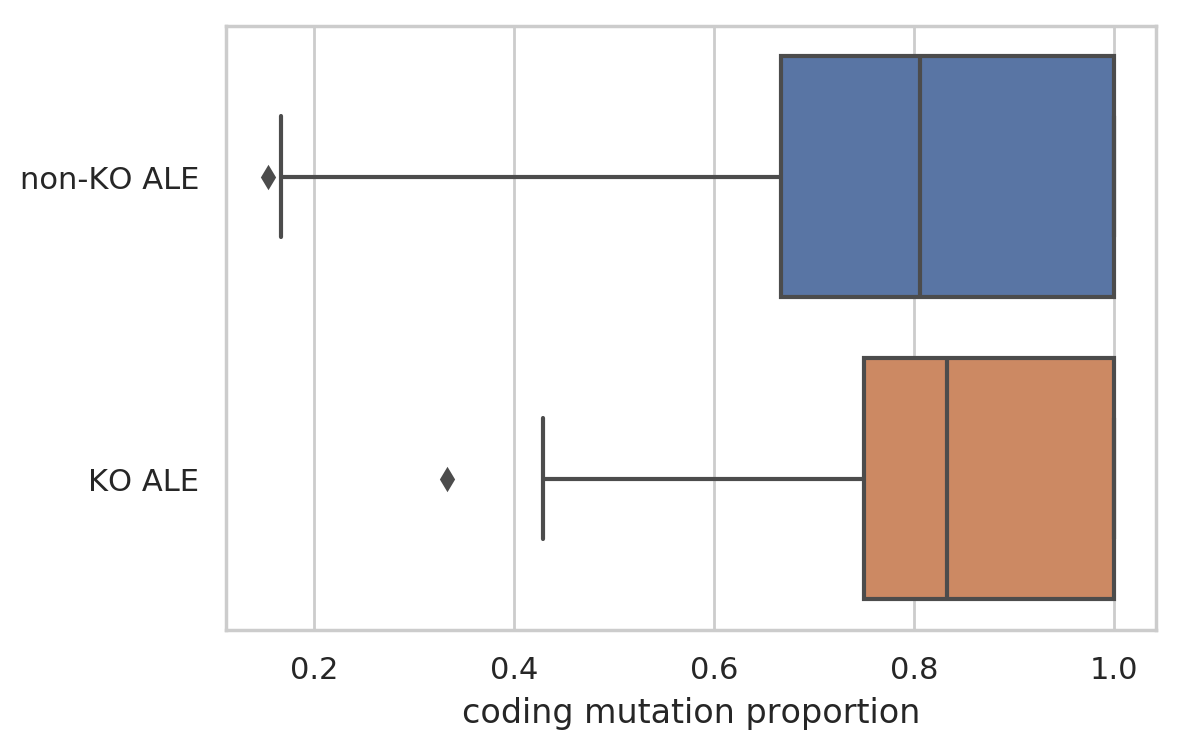

In [90]:
ax = sns.boxplot(x="coding mutation proportion",
                y="exp type",
                data=combo_ALE_coding_prop_df,
                palette="deep",)
# ax.set_title("Coding mutation proportion ")
ax.set_ylabel('')

Text(0, 0.5, '')

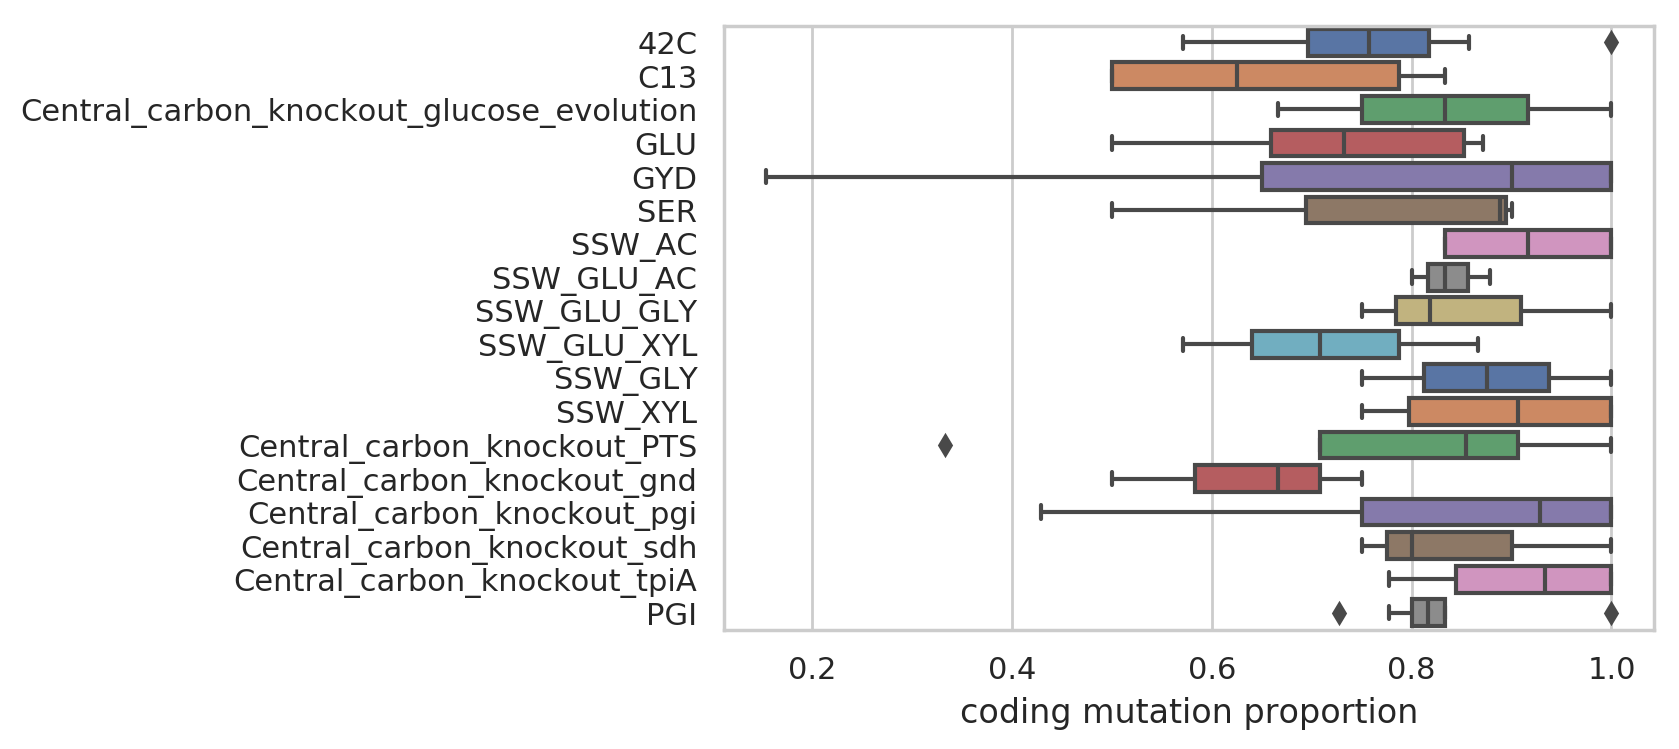

In [91]:
ax = sns.boxplot(x="coding mutation proportion",
                y="exp",
                data=combo_ALE_coding_prop_df,
                palette="deep",)
ax.set_ylabel('')